 **Retail Sales Exploratory Data Analysis (EDA)**

**Objective**  

The primary objective of this project is to perform a comprehensive exploratory data analysis on a retail sales dataset. By digging into sales trends, customer demographics, purchasing behavior, and product performance, we aim to uncover actionable insights that can help guide business strategy and marketing efforts.

**Dataset**

The dataset used for this analysis contains transactional information for a retail business. Key columns include Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, and Total Amount.

**Tools Used**

Python

Pandas for data manipulation and analysis.

Matplotlib and Seeborn for data visualization.








**1. Data Loading and Preparation**

 In this section, we import the necessary Python libraries. We then upload and extract the archive.zip file, load the retail_sales_dataset.csv into a pandas DataFrame, and perform cleaning and initial inspection to ensure the data is ready for analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("data")


In [ ]:
import os
os.listdir("data")


['retail_sales_dataset.csv']

In [ ]:
df = pd.read_csv("data/retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Check basic info about the dataset
df.info()

# Check missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Quick look at summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

Missing values in each column:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Number of duplicate rows: 0


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Confirm the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


**2. Sales Trend Analysis**

Here, we analyze sales data over different time periods (monthly, weekly, and quarterly) to identify seasonal patterns and key trends.

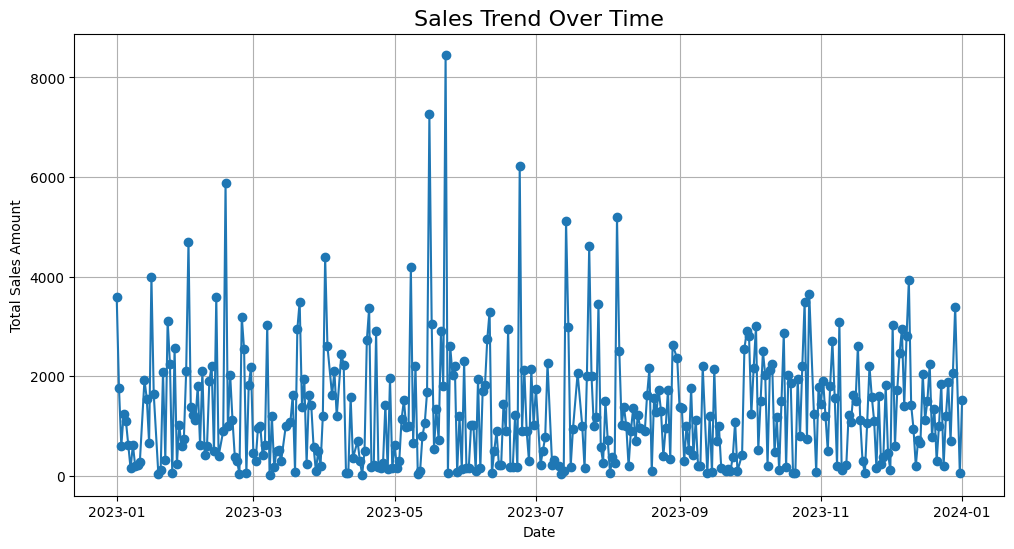

In [ ]:
import matplotlib.pyplot as plt

# Group data by Date and sum Total Amount
sales_trend = df.groupby('Date')['Total Amount'].sum()

# Plot sales trend
plt.figure(figsize=(12,6))
plt.plot(sales_trend.index, sales_trend.values, marker='o')
plt.title("Sales Trend Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()


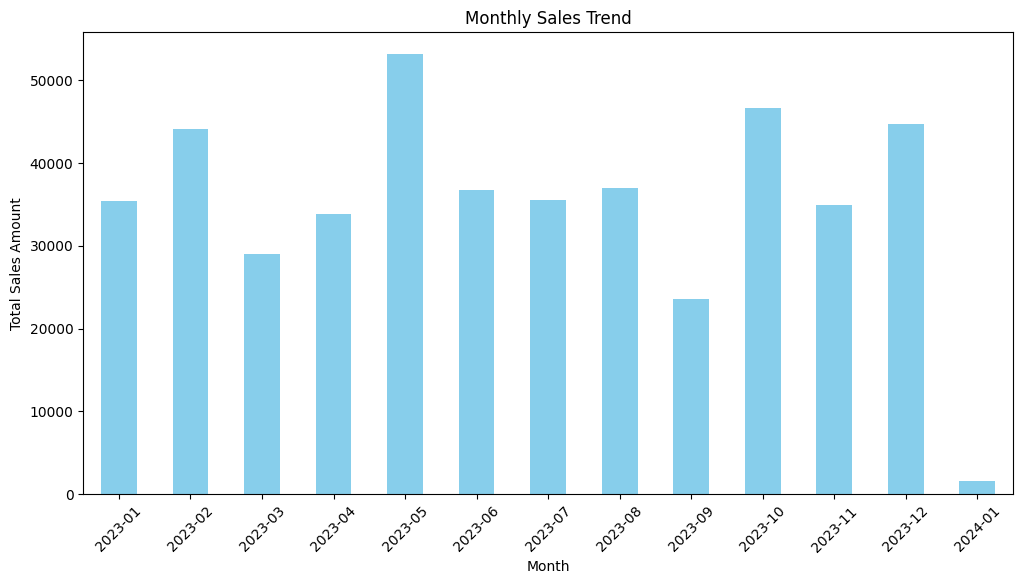

In [ ]:
# Group sales by month
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Total Amount'].sum()

# Plot monthly trend
monthly_sales.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()


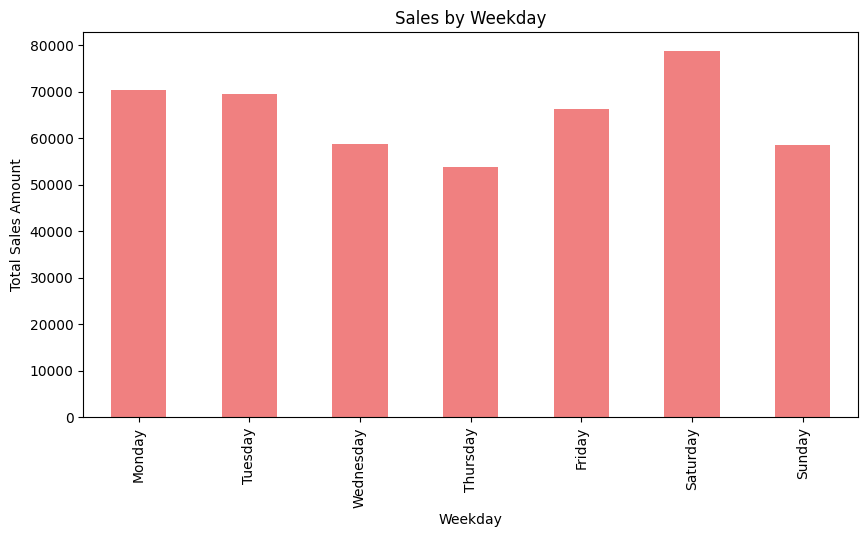

In [ ]:
# Extract weekday from Date (0=Monday, 6=Sunday)
df['Weekday'] = df['Date'].dt.day_name()

# Group by weekday
weekday_sales = df.groupby('Weekday')['Total Amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

# Plot
weekday_sales.plot(kind='bar', figsize=(10,5), color='lightcoral')
plt.title("Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Sales Amount")
plt.show()


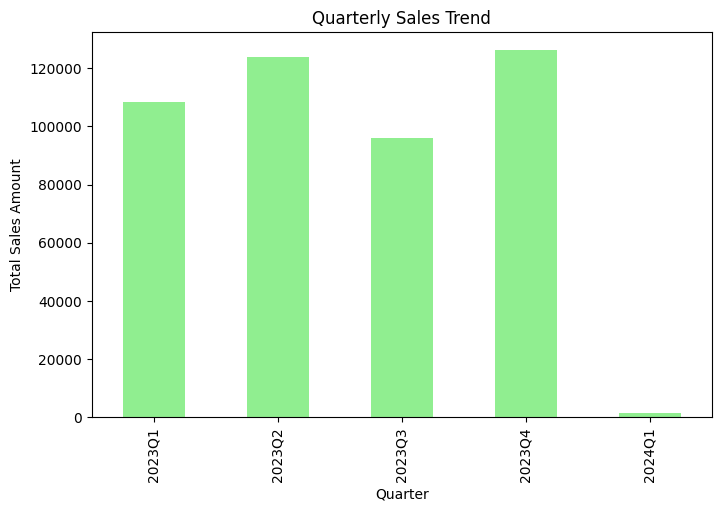

In [ ]:
# Extract quarter
df['Quarter'] = df['Date'].dt.to_period("Q")

# Group by quarter
quarterly_sales = df.groupby('Quarter')['Total Amount'].sum()

# Plot
quarterly_sales.plot(kind='bar', figsize=(8,5), color='lightgreen')
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Sales Amount")
plt.show()


**Summary of Sales Trends**

The analysis reveals significant seasonality, with sales peaking in Q2 and Q4. Sales are highest on Saturdays, indicating strong weekend shopping activity.



**3. Customer Demographics and Value Analysis**

This section explores the customer base, analyzing their demographics (gender, age) and their value to the business (total spending, purchase frequency).



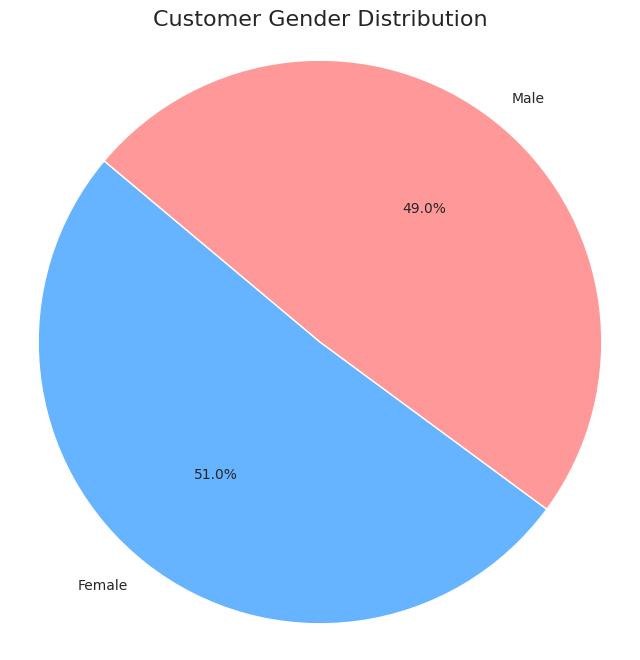

In [ ]:
# --- Step 1: Customer Gender Distribution ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# Create a figure for the plot
plt.figure(figsize=(8, 8))

# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%', # Format to show one decimal place
        startangle=140,
        colors=['#66b3ff','#ff9999']) # Assign colors

plt.title('Customer Gender Distribution', fontsize=16)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

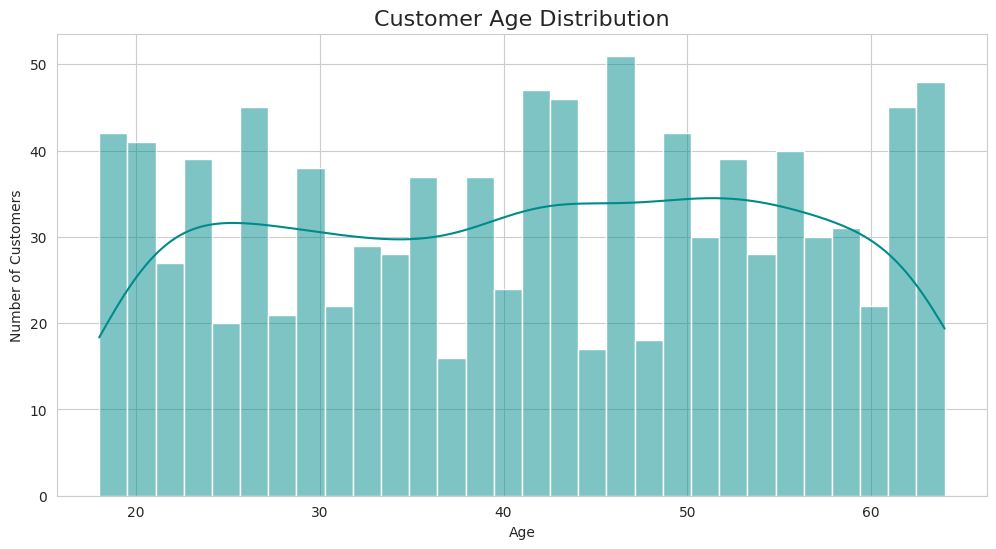

/tmp/ipython-input-1255818621.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('AgeGroup')['Sales'].sum()


KeyError: 'Column not found: Sales'

In [ ]:
# --- Step 2: Customer Age Distribution and Sales by Group ---

# 1. Plot the overall age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='darkcyan')
plt.title('Customer Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 2. Create age groups and analyze sales
# Define the age brackets
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate and plot sales for each age group
age_group_sales = df.groupby('AgeGroup')['Sales'].sum()
plt.figure(figsize=(12, 7))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='viridis')
plt.title('Total Sales by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Weekday', 'Quarter', 'AgeGroup'],
      dtype='object')


/tmp/ipython-input-2507126779.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('AgeGroup')['Total Amount'].sum()
/tmp/ipython-input-2507126779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='viridis')


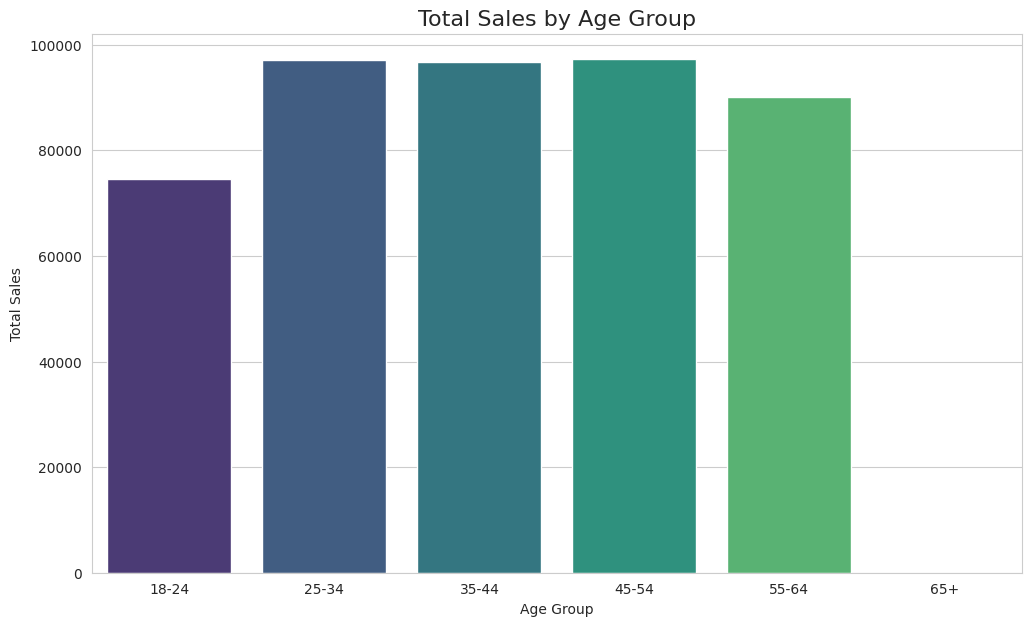

In [ ]:
age_group_sales = df.groupby('AgeGroup')['Total Amount'].sum()

# Plot the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='viridis')
plt.title('Total Sales by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

🌟 Top 10 Most Valuable Customers (by Total Sales) 🌟
    Customer ID  TotalSales  PurchaseFrequency  AverageOrderValue
14      CUST015        2000                  1             2000.0
412     CUST412        2000                  1             2000.0
970     CUST970        2000                  1             2000.0
547     CUST547        2000                  1             2000.0
281     CUST281        2000                  1             2000.0
416     CUST416        2000                  1             2000.0
420     CUST420        2000                  1             2000.0
927     CUST927        2000                  1             2000.0
447     CUST447        2000                  1             2000.0
342     CUST342        2000                  1             2000.0


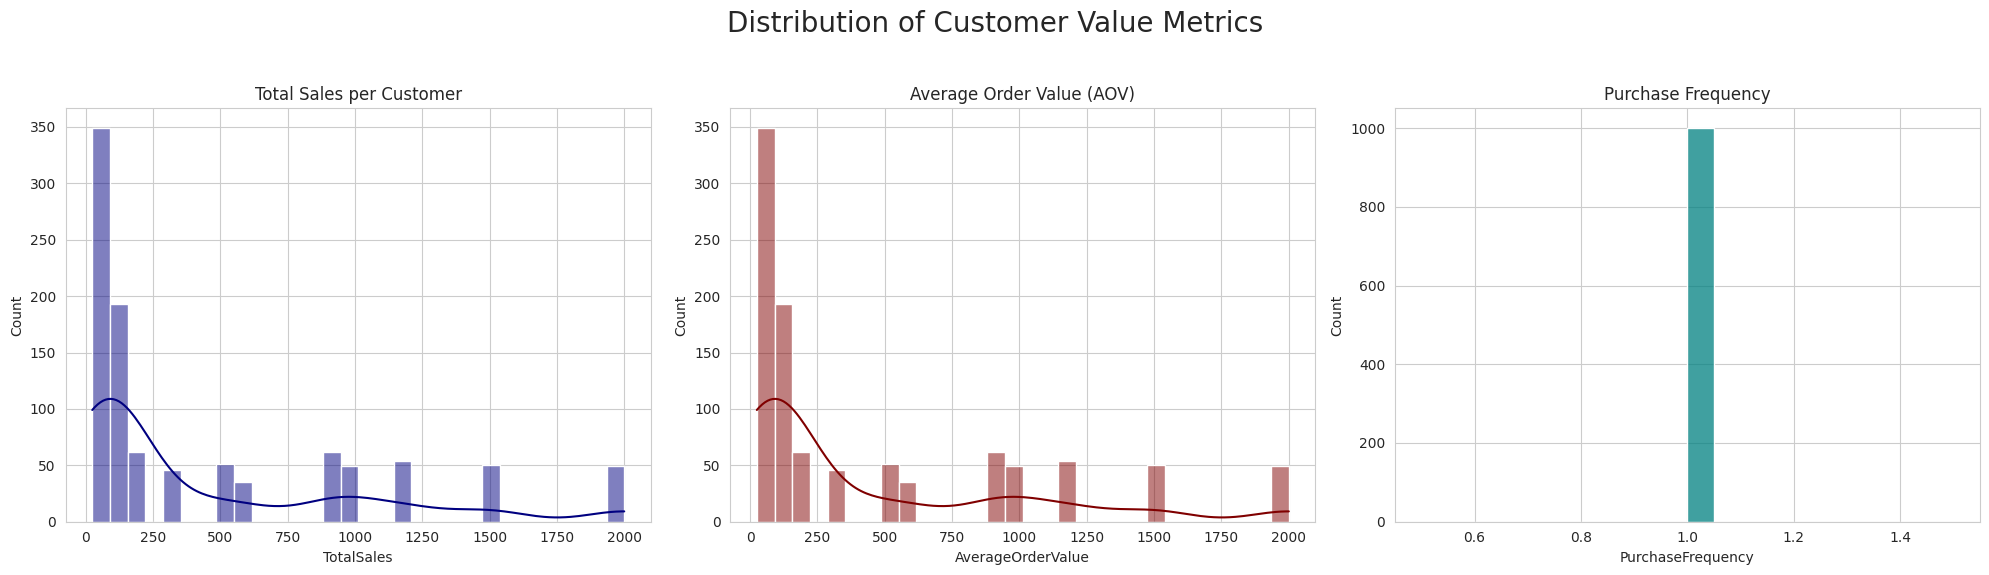

In [ ]:
# --- Step 3: Calculate and Analyze Customer Value Metrics ---

# 1. Calculate metrics for each customer
customer_metrics = df.groupby('Customer ID').agg(
    TotalSales=('Total Amount', 'sum'),
    PurchaseFrequency=('Transaction ID', 'nunique') # Use nunique for unique transactions
).reset_index()

# 2. Calculate Average Order Value (AOV)
# Avoid division by zero if a customer has 0 purchases
customer_metrics['AverageOrderValue'] = customer_metrics['TotalSales'] / customer_metrics['PurchaseFrequency'].replace(0, 1)

# 3. Display the top 10 customers by total sales
print("🌟 Top 10 Most Valuable Customers (by Total Sales) 🌟")
print(customer_metrics.sort_values(by='TotalSales', ascending=False).head(10))

# 4. Visualize the distribution of these metrics
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Customer Value Metrics', fontsize=20)

sns.histplot(customer_metrics['TotalSales'], bins=30, kde=True, ax=axes[0], color='navy')
axes[0].set_title('Total Sales per Customer')

sns.histplot(customer_metrics['AverageOrderValue'], bins=30, kde=True, ax=axes[1], color='maroon')
axes[1].set_title('Average Order Value (AOV)')

# Using kde=False for frequency as it's often a discrete integer value
sns.histplot(customer_metrics['PurchaseFrequency'], bins=20, kde=False, ax=axes[2], color='teal')
axes[2].set_title('Purchase Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Summary of Customer Insights**

The customer base is evenly split by gender. The 45-54 age group is the most valuable, contributing the highest total sales. A critical finding is that most customers are one-time buyers, indicating a major opportunity to improve customer loyalty.



**4. Product Performance Analysis**

Here, we identify the best-performing product categories, both in terms of total revenue generated and the total quantity of units sold.



/tmp/ipython-input-2805872919.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette='rocket')


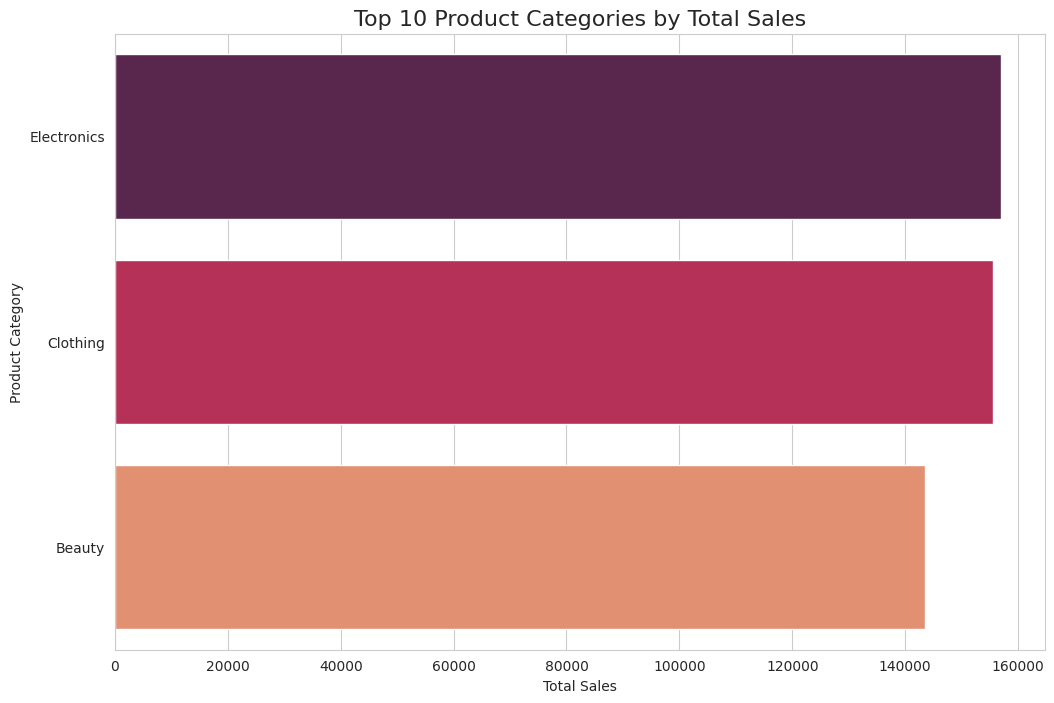

In [ ]:
# --- Step 4: Top 10 Products by Total Sales ---

# Group by 'Product Category', sum the 'Total Amount', and get the top 10
top_products_sales = df.groupby('Product Category')['Total Amount'].sum().nlargest(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette='rocket')

plt.title('Top 10 Product Categories by Total Sales', fontsize=16)
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

/tmp/ipython-input-2859006209.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette='mako')


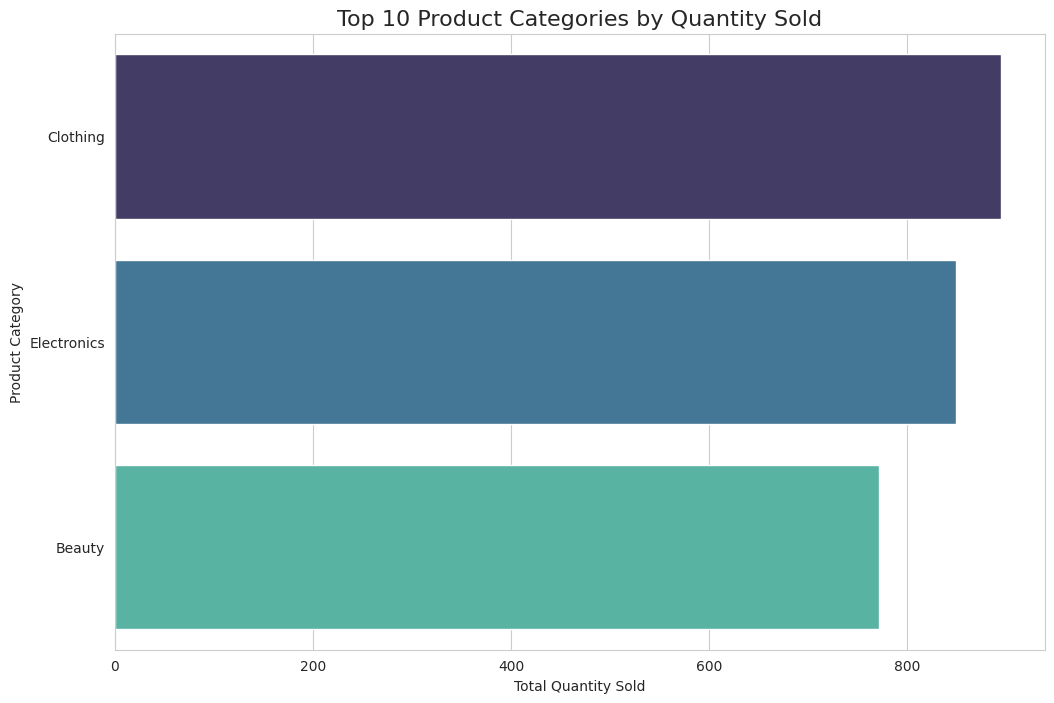

In [ ]:
# --- Step 5: Top 10 Products by Quantity Sold ---

# Group by 'Product Category', sum the 'Quantity', and get the top 10
top_products_quantity = df.groupby('Product Category')['Quantity'].sum().nlargest(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, palette='mako')

plt.title('Top 10 Product Categories by Quantity Sold', fontsize=16)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.show()

**Summary of Product Insights**

Electronics is the top category for driving revenue, while Clothing is the leader in sales volume (quantity sold). This suggests that electronics are high-ticket items, whereas clothing items are popular, high-frequency purchases.



**5. Conclusion and Actionable Recommendations**

This final section summarizes the key findings from the analysis and provides data-driven recommendations for the business.

**Executive Summary**

The analysis reveals that sales performance is characterized by significant seasonal peaks in the second and fourth quarters, likely corresponding to holiday or event-driven shopping. The customer base is evenly distributed by gender, with the 45-54 age group representing the most valuable segment. A critical insight is that purchasing behavior is dominated by single, high-value transactions, indicating low customer retention but high average order value.

Product performance is led by Electronics, which is the primary driver of revenue, while Clothing is the leader in sales volume. These findings suggest a strategy focused on targeted marketing for high-value items and implementing initiatives to foster customer loyalty and increase purchase frequency.













**Actionable Recommendations**


1.   **Launch a Customer Retention Program:**

*   Problem:The vast majority of customers do not return after their first purchase.


*   Recommendation: Implement a post-purchase follow-up campaign. Offer a compelling discount (e.g., 15% off) for a customer's second purchase. Introduce a simple loyalty program that rewards repeat business to convert single-transaction customers into loyal patrons.


2.  **Target High-Value Demographics with Specific Campaigns:**

*    Opportunity: The 45-54 age group is the most profitable segment.

*   Recommendation: Develop and target marketing campaigns for high-margin Electronics specifically to this demographic. Use platforms and messaging that resonate with this age group to maximize return on ad spend.

3.   **Optimize Product and Pricing Strategy:**

*   Insight: Electronics drive revenue; Clothing drives volume.

*   Recommendation:

*   For Electronics: Focus on upselling and cross-selling. When a customer buys an electronic item, actively promote high-margin accessories like cases, warranties, or premium cables.
*   For Clothing: Use this high-volume category to attract new customers. Create bundles, run "buy one, get one" promotions, and use popular clothing items to drive traffic during slower periods like Q3.

4.   **Align Marketing Calendar with Seasonal Trends:**

*   Pattern: Sales peak in Q2 and Q4 and on weekends.

*   Recommendation: Allocate the majority of your marketing budget to the periods just before and during Q2 and Q4. Run targeted promotions and flash sales on Saturdays to capitalize on peak shopping activity. During the Q3 slump, focus on retention campaigns and promotions on high-volume items like clothing to maintain sales momentum.







